In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
%matplotlib inline

In [2]:
july = pd.read_csv('../data/july.csv')
july.head()

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-07-01 00:00:33.550000,36.156678,-86.809004,Powered635135,Powered,22.0,scooter,0.15,Lyft
1,2019-07-01 00:00:34.973000,36.145674,-86.794138,Powered790946,Powered,33.0,scooter,0.15,Lyft
2,2019-07-01 00:00:41.183000,36.179319,-86.751538,Powered570380,Powered,76.0,scooter,0.15,Lyft
3,2019-07-01 00:00:41.620000,36.152111,-86.803821,Powered240631,Powered,43.0,scooter,0.15,Lyft
4,2019-07-01 00:00:45.087000,36.149355,-86.797550,Powered970404,Powered,52.0,scooter,0.15,Lyft


In [3]:
july.companyname.unique()

array(['Lyft', 'Bird', 'Spin', 'Bolt', 'Jump', 'Lime', 'Gotcha'],
      dtype=object)

company_dict = {'Lyft':0, 'Bird': 1, 'Spin': 2, 'Bolt': 3, 'Jump': 4, 'Lime': 5, 'Gotcha': 6}

july.companyname = july.companyname.replace(company_dict)

In [4]:
july.pubdatetime = pd.to_datetime(july.pubdatetime)
july.head(2)

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-07-01 00:00:33.550,36.156678,-86.809004,Powered635135,Powered,22.0,scooter,0.15,Lyft
1,2019-07-01 00:00:34.973,36.145674,-86.794138,Powered790946,Powered,33.0,scooter,0.15,Lyft


In [5]:
july.sumdgroup.unique()

array(['scooter', 'Scooter', 'bicycle'], dtype=object)

In [6]:
july_scooters = july.loc[july.sumdgroup.isin(['scooter', 'Scooter'])]

In [7]:
july_scooters = july_scooters[['pubdatetime', 'latitude', 'longitude', 'sumdid', 'chargelevel', 'companyname']]

In [8]:
july_scooters.to_pickle("../data/july.pkl")

In [9]:
july_pkl = pd.read_pickle("../data/july.pkl")
july_pkl.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-07-01 00:00:33.550,36.156678,-86.809004,Powered635135,22.0,Lyft
1,2019-07-01 00:00:34.973,36.145674,-86.794138,Powered790946,33.0,Lyft
2,2019-07-01 00:00:41.183,36.179319,-86.751538,Powered570380,76.0,Lyft
3,2019-07-01 00:00:41.620,36.152111,-86.803821,Powered240631,43.0,Lyft
4,2019-07-01 00:00:45.087,36.149355,-86.797550,Powered970404,52.0,Lyft


In [10]:
july_pkl.describe()

,latitude,longitude,chargelevel
count,2.506652e+07,2.506652e+07,2.506632e+07
mean,3.783235e+01,-8.670358e+01,5.151019e+01
std,2.497648e+03,2.331620e+00,3.733133e+01
min,0.000000e+00,-9.744388e+01,0.000000e+00
25%,3.612010e+01,-8.678850e+01,3.000000e+00
50%,3.614853e+01,-8.677546e+01,5.900000e+01
75%,3.615993e+01,-8.675340e+01,8.700000e+01
max,3.609874e+06,0.000000e+00,1.000000e+02


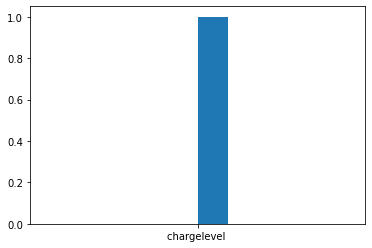

In [11]:
plt.hist('chargelevel ', bins = 10, data = july_pkl);

<AxesSubplot:>

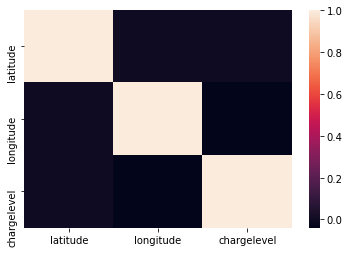

In [12]:
corr = july_pkl.corr()
sns.heatmap(corr)

In [18]:

july_pkl.companyname.value_counts()

Jump      10367575
Bird       3702282
Lime       3233573
Lyft       2890233
Gotcha     1933513
Spin       1750581
Bolt       1188767
Name: companyname, dtype: int64

In [14]:
def hist_comp(df, company):
    if company=='All':
        plt.hist(df.sumdid.value_counts().values)
        
    else:
        plt.hist(july_pkl[df.companyname==company].sumdid.value_counts().values)
        
    plt.title(company)

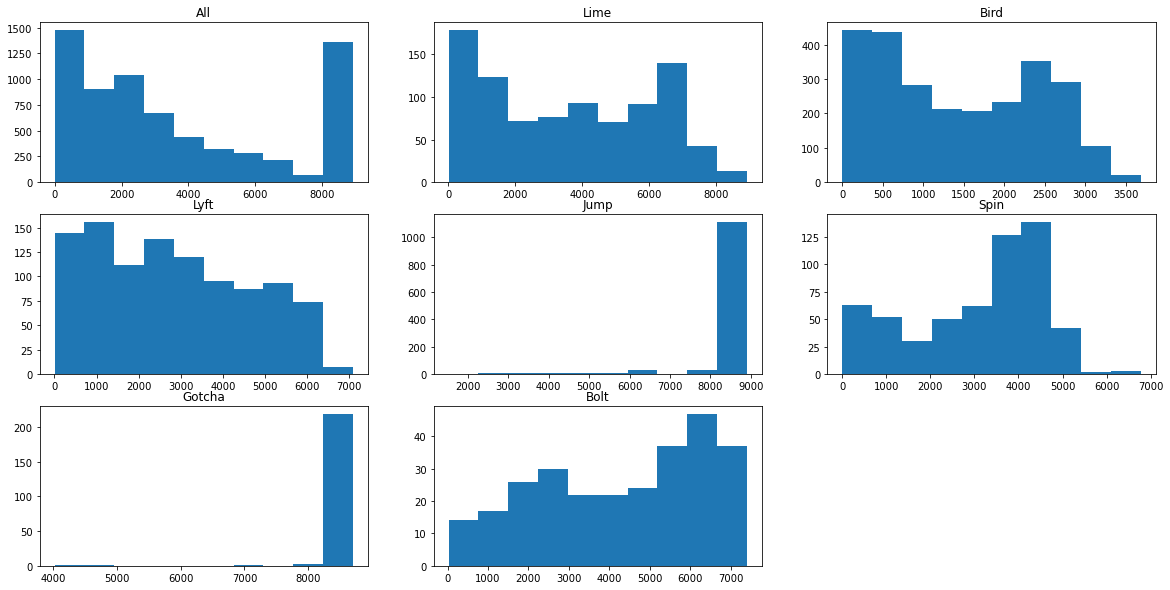

In [15]:
plt.figure(figsize=(20,10))

plt.subplot(3,3,1)
hist_comp(july_pkl, 'All')

plt.subplot(3,3,2)
hist_comp(july_pkl, 'Lime')

plt.subplot(3,3,3)
hist_comp(july_pkl, 'Bird')

plt.subplot(3,3,4)
hist_comp(july_pkl,'Lyft')

plt.subplot(3,3,5)
hist_comp(july_pkl,'Jump')

plt.subplot(3,3,6)
hist_comp(july_pkl,'Spin')

plt.subplot(3,3,7)
hist_comp(july_pkl,'Gotcha')

plt.subplot(3,3,8)
hist_comp(july_pkl,'Bolt')

In [16]:
#Pings more frequently, creating excess amounts

In [31]:
july_pkl.sumdid.value_counts().tail(30)

PoweredMZAHA6ISF4R3Y    8
Powered6XPDX            8
PoweredP6WPDLAKL7IEC    8
Powered13WNI            7
Powered2541946          7
PoweredEDT4L            6
PoweredV6HA6            6
PoweredEVWKZ            5
PoweredZC17U            5
PoweredGF4UW4AODW5AF    5
PoweredNEWB6            4
Powered047010           3
Powered5532321          2
PoweredF5ALZ            2
PoweredFDPBKXIAIXBW2    2
Powered3PD13            2
PoweredIB2CC            2
PoweredPGT79            2
PoweredQB5L6            2
PoweredCPHMRCMZUUDRA    1
PoweredC7EZRZTYAREOS    1
Powered6EPAKQB4QHWJF    1
Powered5WF3M            1
Powered6TPOZJO4U6WGE    1
PoweredMMQC4MGMOH675    1
PoweredA9GT8            1
Powered2045928          1
Powered3ZPZ7            1
Powered4314410          1
PoweredBHQPF4NGORWCW    1
Name: sumdid, dtype: int64

In [35]:
july_pkl[july_pkl.sumdid=='PoweredZC17U']#pings every 5 minutes

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
637,2019-07-01 00:01:50.957,36.164099,-86.776800,PoweredZC17U,100.0,Bird
3349,2019-07-01 00:06:51.217,36.164099,-86.776800,PoweredZC17U,100.0,Bird
6412,2019-07-01 00:11:51.303,36.163991,-86.776702,PoweredZC17U,100.0,Bird
9676,2019-07-01 00:16:51.567,36.163991,-86.776702,PoweredZC17U,100.0,Bird
13595,2019-07-01 00:21:51.887,36.163825,-86.776899,PoweredZC17U,100.0,Bird
